# Assignment: Linear Models
## Foundations of Machine Learning
## Do Q1 and one other question

**Q1.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented

1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.
2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?
3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?
4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Property Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.
7. (Optional) We've included `Neighborhood ` and `Property Type` separately in the model. How do you interact them, so you can have "A bedroom in Queens" or "A townhouse in Manhattan". Split the sample 80/20 into a training and a test set and run a regression including that kind of "property type X neighborhood" dummy, plus `Review Scores Rating`. How does the slope coefficient for `Review Scores Rating`, the $R^2$, and the RMSE change? Do they increase significantly compares to part 5? Are the coefficients in this regression just the sum of the coefficients for `Neighbourhood ` and `Property Type` from 5? What is the most expensive kind of property you can rent? 

In [127]:
import seaborn as sns

In [128]:
import pandas as pd
import numpy as np

# 1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.
df = pd.read_csv('./data/Q1_clean.csv')
print(df.shape, '\n')
df.head()

(22153, 5) 



,Price,Review Scores Rating,Neighbourhood,Property Type,Room Type
0,549,96.0,Manhattan,Apartment,Private room
1,149,100.0,Brooklyn,Apartment,Entire home/apt
2,250,100.0,Manhattan,Apartment,Entire home/apt
3,90,94.0,Brooklyn,Apartment,Private room
4,270,90.0,Manhattan,Apartment,Entire home/apt


In [129]:
df['neighbourhood'] = df['Neighbourhood ']
nbhood = df['neighbourhood']
df['Price'].groupby(nbhood).describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood,,,,,,,,
Bronx,217.0,75.276498,39.755468,10.0,50.00,60.0,90.0,244.0
Brooklyn,8487.0,127.747378,106.038466,20.0,75.00,100.0,150.0,4500.0
Manhattan,11763.0,183.664286,170.434606,25.0,103.00,150.0,214.0,10000.0
Queens,1590.0,96.857233,61.712648,25.0,60.00,80.0,115.0,950.0
Staten Island,96.0,146.166667,508.462029,35.0,54.75,71.0,99.0,5000.0


> Manhattan is the most expensive neighborhood on average, with a mean of $183.66 per night

<Axes: xlabel='Price', ylabel='Density'>

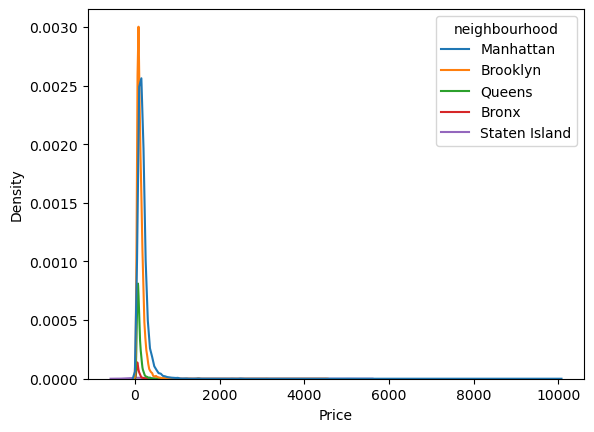

In [130]:
sns.kdeplot(x=df['Price'], hue=df['neighbourhood'])

<Axes: xlabel='Price', ylabel='Density'>

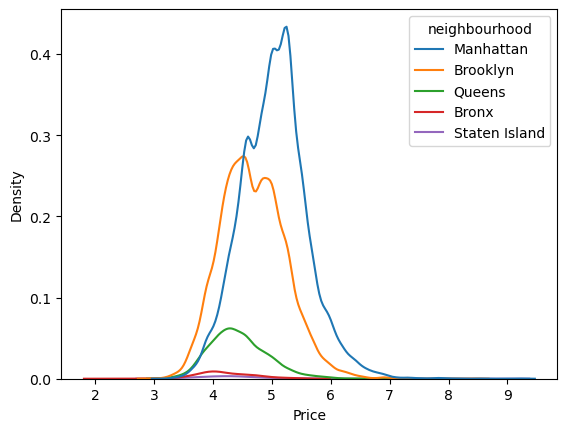

In [131]:
sns.kdeplot(x=np.log(df['Price']), hue=df['neighbourhood'])

> We see that Manhattan has a higher peak density at a higher price compared to the rest of the borough.

In [132]:
# 2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?
from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept=False).fit(pd.get_dummies(df['Neighbourhood '], dtype='int') ,df['Price'])
table = pd.DataFrame({'Neighborhood': lr.feature_names_in_, 'Coefficient': lr.coef_})
table


,Neighborhood,Coefficient
0,Bronx,75.276498
1,Brooklyn,127.747378
2,Manhattan,183.664286
3,Queens,96.857233
4,Staten Island,146.166667


> The coefficients in the table above are identical to the means of the neighborhoods. The coefficients in a regression of a continuous variable on one categorical variable are the mean.

In [133]:
# 3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?
lri = LinearRegression().fit(pd.get_dummies(df['Neighbourhood '], dtype='int', drop_first=True) ,df['Price'])
table_lri = pd.DataFrame({'Neighborhood': lri.feature_names_in_, 'Coefficient': lri.coef_})
print(lri.intercept_)
table_lri

75.27649769584977


,Neighborhood,Coefficient
0,Brooklyn,52.470881
1,Manhattan,108.387789
2,Queens,21.580735
3,Staten Island,70.890169


> After dropping Bronx, the intercept is identical to the grouped mean of Bronx. The coefficients of the other variables are their old coefficients minus the intercept.

In [134]:
# 4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

y = df['Price']
X = df.loc[:,['Review Scores Rating', 'Neighbourhood ']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=100)

lr_train = pd.concat([X_train['Review Scores Rating'], pd.get_dummies(X_train['Neighbourhood '], dtype='int')], axis = 1)
lr_test = pd.concat([X_test['Review Scores Rating'], pd.get_dummies(X_test['Neighbourhood '], dtype='int')], axis = 1)

regression = LinearRegression(fit_intercept=False).fit(lr_train, y_train)

y_pred = regression.predict(lr_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

coef_review_scores_rating = regression.coef_[0]

print(f"R^2 on the test set: {r2}")
print(f"RMSE on the test set: {rmse}")
print(f"Coefficient for 'Review Scores Rating': {coef_review_scores_rating}")
print(f"The most expensive kind of property you can rent is: {coef_review_scores_rating * 100 + max(regression.coef_)}, a 100 rated place in Manhattan")


R^2 on the test set: 0.06701086106947296
RMSE on the test set: 125.01092061382933
Coefficient for 'Review Scores Rating': 1.0322568767213829
The most expensive kind of property you can rent is: 192.64670789973687, a 100 rated place in Manhattan


In [135]:
# 5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Property Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
y = df['Price']
X = df.loc[:,['Review Scores Rating', 'Neighbourhood ', 'Room Type']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=100)

lr_train = pd.concat([X_train['Review Scores Rating'], pd.get_dummies(X_train['Neighbourhood '], dtype='int'), pd.get_dummies(X_train['Room Type'], dtype='int')], axis = 1)
lr_test = pd.concat([X_test['Review Scores Rating'], pd.get_dummies(X_test['Neighbourhood '], dtype='int'), pd.get_dummies(X_test['Room Type'], dtype='int')], axis = 1)

regression = LinearRegression(fit_intercept=False).fit(lr_train, y_train)

y_pred = regression.predict(lr_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
coef_review_scores_rating = regression.coef_[0]

print(f"R^2 on the test set: {r2}")
print(f"RMSE on the test set: {rmse}")
print(f"Coefficient for 'Review Scores Rating': {coef_review_scores_rating}")
print(f"The most expensive kind of property you can rent is: ${coef_review_scores_rating * 100 + max(regression.coef_) + regression.coef_[3]}")


results = pd.DataFrame({'variable':regression.feature_names_in_, 'coefficient': regression.coef_})
results

R^2 on the test set: 0.2203534812928234
RMSE on the test set: 114.27692123130632
Coefficient for 'Review Scores Rating': 0.6269122705801646
The most expensive kind of property you can rent is: $227.00235089994283


,variable,coefficient
0,Review Scores Rating,0.626912
1,Bronx,-13.022765
2,Brooklyn,10.378456
3,Manhattan,53.693304
4,Queens,-6.833330
5,Staten Island,50.003022
6,Entire home/apt,110.617820
7,Private room,3.101341
8,Shared room,-19.500474


6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.

The Review Scores Rating coefficient changed because we included the additional variable of Room Type in our model for part 5. This inclusion changed how we calculated the coefficient for Review Scores Rating, thus changing its coefficient. Room Type has some effect on the rating of the room, which we see in those difference in statistical values between part 4 and 5. The $r^2$ value also increased in part 5, meaning that adding the Room Type variable resulted in more of the variation being explained by our model.

**Q2.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv 
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

In [136]:
# 1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
df = pd.read_csv('./data/cars_hw.csv')
print(df.shape, '\n')
df.head()

(976, 12) 



,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [137]:
print(f"Min mileage run value: {min(df['Mileage_Run'].values)}. Max value: {max(df['Mileage_Run'].values)}")
print(f"Min price value: {min(df['Price'].values)}. Max value: {max(df['Price'].values)}")
# The differences between min and max are pretty big, indicating some bad scaling.
df['mrun'] = np.arcsinh(df['Mileage_Run'])
df['price'] = np.arcsinh(df['Price'])
df['age'] = max(df['Make_Year'])-df['Make_Year']
df = df.drop(['Mileage_Run','Price', 'Make_Year', 'Unnamed: 0'],axis=1)

Min mileage run value: 1117. Max value: 99495
Min price value: 188000. Max value: 2941000


In [138]:
# 2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
df['price'].groupby(df['Make']).describe()

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Chevrolet,6.0,13.613042,0.480975,13.188151,13.261539,13.445433,13.864828,14.394369
Datsun,3.0,13.269194,0.036311,13.232114,13.251449,13.270783,13.287734,13.304685
Ford,52.0,14.161427,0.210895,13.270783,14.054527,14.162640,14.269131,14.572571
Honda,73.0,14.229465,0.336972,13.356645,13.965653,14.266586,14.419827,14.938490
Hyundai,305.0,14.061658,0.398781,13.114331,13.785051,14.059241,14.330727,15.063692
Jeep,4.0,14.909738,0.105084,14.763300,14.876417,14.933413,14.966733,15.008827
Kia,8.0,14.985324,0.076877,14.822738,14.965389,14.996253,15.042662,15.063117
MG Motors,35.0,15.132199,0.066263,14.971763,15.088892,15.122762,15.190744,15.211260
Mahindra,18.0,14.592100,0.159906,14.280502,14.544955,14.598828,14.654396,14.890513


<Axes: xlabel='price', ylabel='Density'>

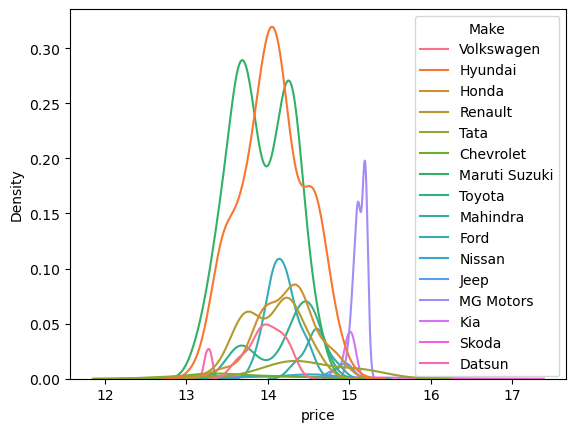

In [139]:
sns.kdeplot(x=df['price'], hue=df['Make'])

> MG Motors and Kia cars are generally more expensive than the rest of the car brands based on the KDE plot. Jeep is also expensive, with a mean and median close behind Kia. The prices of most of the car brands generally follow a unimodal distribution.

In [140]:
# 3. Split the data into an 80% training set and a 20% testing set.
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=.2, random_state=100)

In [141]:
# 4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
xtrain_numeric = X_train.loc[:,['age', 'mrun', 'Seating_Capacity']]
regn = LinearRegression().fit(xtrain_numeric, y_train)

xtest_numeric = X_test.loc[:,['age', 'mrun', 'Seating_Capacity']]
yhat = regn.predict(xtest_numeric)
rmse_n = np.sqrt( np.mean( (y_test - yhat)**2 ))

print(f"Numeric r-squared on test set = {regn.score(xtest_numeric,y_test)}")
print(f"Numeric RMSE = {rmse_n}") 

Numeric r-squared on test set = 0.4383356309398455
Numeric RMSE = 0.33289440734746273


In [142]:
categorical_vars = ['Make','Fuel_Type','Transmission_Type', 'Transmission', 'Body_Type','Color']

xtrain_cat = pd.DataFrame([])
xtest_cat = pd.DataFrame([])
for var in categorical_vars:
  dums_train = pd.get_dummies( X_train[var], drop_first=True, dtype=int)
  xtrain_cat = pd.concat([xtrain_cat, dums_train], axis=1, ignore_index=True) 

  dums_test = pd.get_dummies( X_test[var], drop_first=True, dtype=int)
  dums_test = dums_test.reindex(columns=dums_train.columns, fill_value=0)
  xtest_cat = pd.concat([xtest_cat, dums_test], axis=1, ignore_index=True) 

reg_c = LinearRegression().fit(xtrain_cat,y_train)
yhat_c = reg_c.predict(xtest_cat)
rmse_c = np.sqrt( np.mean( (y_test - yhat_c)**2 ))

print(f"Categorical r-squared = {reg_c.score(xtest_cat,y_test)}")
print(f"Categorical RMSE = {rmse_c}") 

Categorical r-squared = 0.6649870452570248
Categorical RMSE = 0.2570980973741446


In [143]:
# Combine numeric _n and categorical _c variables:
xtrain_combo = pd.concat([xtrain_numeric, xtrain_cat],axis=1, ignore_index=True)
xtest_combo = pd.concat([xtest_numeric, xtest_cat],axis=1, ignore_index=True)

reg_all = LinearRegression().fit(xtrain_combo,y_train)
y_hat_combo = reg_all.predict(xtest_combo)
print('Combined r-squared: ', reg_all.score(xtest_combo,y_test))
rmse_all = np.sqrt( np.mean( (y_test - y_hat_combo)**2 ))
print('Combined RMSE: ', rmse_all)

Combined r-squared:  0.8296072143687784
Combined RMSE:  0.18335538254638456


> The combined model has the highest $r^2$ of 0.83, meaning that it is the best model out of the categorical, numerical, and combined models. The $r^2$ of categorical and numerical variables are pretty low, meaning that the model doesn't explain a lot of the variation.

In [144]:
#   5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?
from sklearn.preprocessing import PolynomialFeatures

for deg in range(1,5):
  expander = PolynomialFeatures(degree=deg,include_bias=False) 

  Z = expander.fit_transform(xtrain_numeric)
  names = expander.get_feature_names_out() 
  xtrain_df = pd.DataFrame(data=Z, columns = names)
  
  Z = expander.fit_transform(xtest_numeric)
  names = expander.get_feature_names_out() 
  xtest_df = pd.DataFrame(data=Z, columns = names)

  xtrain_df.reset_index(drop=True, inplace=True)
  xtrain_cat.reset_index(drop=True, inplace=True)

  xtest_df.reset_index(drop=True, inplace=True)
  xtest_cat.reset_index(drop=True, inplace=True)

  xtrain_combo = pd.concat([xtrain_df, xtrain_cat],axis=1, ignore_index=True)
  xtest_combo = pd.concat([xtest_df, xtest_cat],axis=1, ignore_index=True)

  reg = LinearRegression().fit(xtrain_combo, y_train)
  yhat = reg.predict(xtest_combo)
  rmse = np.sqrt( np.mean( (y_test - yhat)**2 ))
  print(f"Degree: {deg}")
  print(f"R-squared: {reg.score(xtest_combo, y_test)} - RMSE: {rmse}", end="\n \n")


Degree: 1
R-squared: 0.8296072143687784 - RMSE: 0.18335538254638456
 
Degree: 2
R-squared: 0.8369687741936881 - RMSE: 0.17935085816813925
 
Degree: 3
R-squared: 0.7451642634576052 - RMSE: 0.22423232880520366
 
Degree: 4
R-squared: -63699771.8283307 - RMSE: 3545.169496202843
 


> As the degree increases from 1 to 2, the model gets slightly better. From a degree of 2-4, the model gets slightly worse, then a lot worse. At a degree of 4, we see the $r^2$ result in a negative value. The degree of 2 has the highest $r^2$ and an RMSE of 0.18, meaning that the most variation is explained by the model. The degree of 2 is nominally better than the best model of part 4, with around a 1% increase in $r^2$ and 1% decrease in RMSE.

<Axes: xlabel='price'>

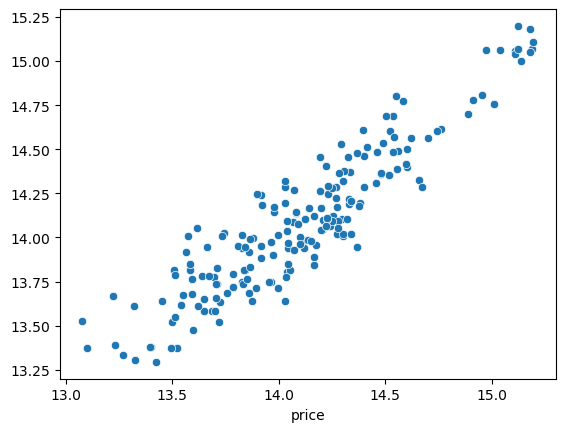

In [145]:
# 6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.
expander = PolynomialFeatures(degree=2,include_bias=False) 

Z = expander.fit_transform(xtrain_numeric)
names = expander.get_feature_names_out() 
xtrain_df = pd.DataFrame(data=Z, columns = names)

Z = expander.fit_transform(xtest_numeric)
names = expander.get_feature_names_out() 
xtest_df = pd.DataFrame(data=Z, columns = names)

xtrain_df.reset_index(drop=True, inplace=True)
xtrain_cat.reset_index(drop=True, inplace=True)

xtest_df.reset_index(drop=True, inplace=True)
xtest_cat.reset_index(drop=True, inplace=True)

xtrain_combo = pd.concat([xtrain_df, xtrain_cat],axis=1, ignore_index=True)
xtest_combo = pd.concat([xtest_df, xtest_cat],axis=1, ignore_index=True)

xtrain_combo.columns = xtrain_combo.columns.astype(str)
xtest_combo.columns = xtest_combo.columns.astype(str)

reg = LinearRegression().fit(xtrain_combo, y_train)
yhat = reg.predict(xtest_combo)
residuals = y_test - yhat

sns.scatterplot(x=y_test,y=yhat)

> The predicted and true values roughly lie along the diagonal.

<Axes: xlabel='price', ylabel='Density'>

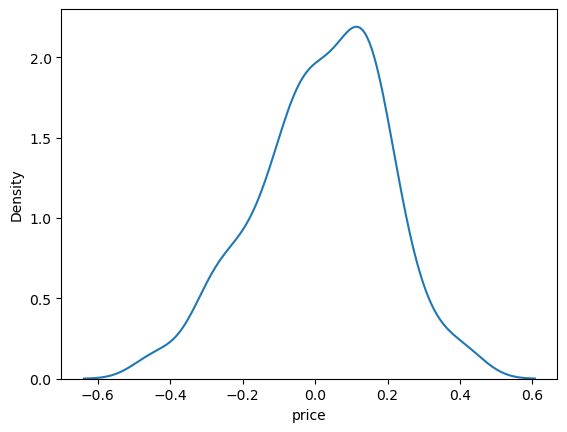

In [146]:
sns.kdeplot(residuals)

> There's a rough unimodal bell shape to the distribution, but it's not exactly centered on 0. There is a very slight left skew to this KDE plot.

Based on the scatter plot, the predicted and true values do align quite closely along the diagonal, which suggests that the model has good predictive power. The points are not perfectly on the line, indicating there is some variance in the predictions, which is expected in any real-world data modeling.

The kernel density plot of the residuals shows a unimodal, roughly bell-shaped distribution that is not perfectly centered on zero, with a slight skew to the left. This indicates that most predictions are close to the true values, but there may be a tendency to slightly underpredict the price.

The scatter plot indicates that the model does a good job at predicting the car prices, given the alignment of points along the diagonal. The residuals being approximately normally distributed suggest that the linear regression assumptions hold true for the most part, and the model is appropriate for the data. The center of the kernel density plot is near zero, which implies that the model does not have a high degree of bias. The slight left skew in residuals could mean that the model is consistently underestimating the true values by a small margin for certain predictions. The scatter plot shows a few points that are away from the diagonal line, suggesting there could be outliers or leverage points that are not well-explained by the model. While the model does well, the points in the scatter plot are not tightly clustered around the diagonal, indicating there is variance in the data that the model does not capture.


**Q3.** This is a question about linear regression. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent 
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running the following regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q4.** This is a math question to review the derivation of the OLS estimator (but only if you are into that kind of thing!). We are going to do it slightly differently from what we did in class, though. We will use a linear predictor and minimize the Sum of Squared Errors, just as in class. But, we are going to de-mean $X$ first, creating another variable $z_i = x_i - \bar{x}$ where 
$$
\bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i,
$$
so the model is $\hat{y}_i = a + b z_i$ and the `SSE` is
$$
\text{SSE}(a,b) = \sum_{i=1}^N (y_i - a - bz_i)^2.
$$

  1. Take partial derivatives of the `SSE` with respect to $a$ and $b$. You should get

\begin{alignat*}{3}
\sum_{i=1}^N -2(y_i - a- bz_i) &=& 0 \\
\sum_{i=1}^N -2(y_i - a - bz_i)z_i &=& 0.
\end{alignat*}

  2. Solve for the solutions to the above equations. Big hint: $\bar{z} = 0$, since we subtracted the mean of $x$ from $x$ to get $z$. You should get

\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})z_i}{\sum_{i=1}^N z_i^2}.
\end{alignat*}

  3. Substitute $z_i = x_i - \bar{x}$ back into the above equations. You should get
  
\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{alignat*}

which can be written in terms of sample covariance and sample variance as:

\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\text{cov}(x,y)}{\text{var}(x)}.
\end{alignat*}

This is typically the preferred way of expressing the OLS coefficients.

4. When will $b^*$ be large or small, depending on the relationship between $x$ and $y$ and the amount of "noise"/variance in $x$? What does $a^*$ represent?
5. Suppose you have measurement error in $x$ which artificially inflates its variance (e.g. bad data cleaning). What happens to the $b^*$ coefficient? How will affect your ability to predict? (This phenomenon is called **attenuation**.)

**Q5.** 
1. Find a dataset on a topic you're interested in. Some easy options are data.gov, kaggle.com, and data.world.
2. Clean the data and do some exploratory data analysis on key variables that interest you. Pick a particular target/outcome variable and features/predictors.
3. Split the sample into an ~80% training set and a ~20% test set.
4. Run a few regressions of your target/outcome variable on a variety of features/predictors. Compute the SSE on the test set.
5. Which model performed the best, and why?
6. What did you learn?